In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import urllib3 

import matplotlib.pyplot as plt
%matplotlib inline

### State-level

#### WILL STATE'S MINIMUM WAGE BE AT LEAST $15 BY 2024 OR IS IT INDEXED FOR INFLATION?

In [2]:
# https://scorecard.prosperitynow.org/data-by-issue#jobs/policy/minimum-wage
minimum_wage = {
    'Alabama': False,
    'Alaska': True,
    'Arizona': True,
    'Arkansas': False,
    'California': True,
    'Colorado': True,
    'Connecticut': False,
    'Delaware': False,
    'District of Columbia': True,
    'Florida': True,
    'Georgia': False,
    'Hawaii': False,
    'Idaho': False,
    'Illinois': False,
    'Indiana': False,
    'Iowa': False,
    'Kansas': False,
    'Kentucky': False,
    'Louisiana': False,
    'Maine': True,
    'Maryland': False,
    'Massachusetts': False,
    'Michigan': False,
    'Minnesota': True,
    'Mississippi': False,
    'Missouri': True,
    'Montana': True,
    'Nebraska': False,
    'Nevada': True,
    'New Hampshire': False,
    'New Jersey': True,
    'New Mexico': False,
    'New York': True,
    'North Carolina': False,
    'North Dakota': False,
    'Ohio': True,
    'Oklahoma': False,
    'Oregon': True,
    'Pennsylvania': False,
    'Rhode Island': False,
    'South Carolina': False,
    'South Dakota': True,
    'Tennessee': False,
    'Texas': False,
    'Utah': False,
    'Vermont': True,
    'Virginia': False,
    'Washington': True,
    'West Virginia': False,
    'Wisconsin': False,
    'Wyoming': False
}

#### DOES STATE HAVE A PROGRESSIVE EFFECTIVE TAX RATE ?

In [3]:
# https://scorecard.prosperitynow.org/data-by-issue#finance/policy/tax-fairness
tax_rate = {
    'Alabama': False,
    'Alaska': False,
    'Arizona': False,
    'Arkansas': False,
    'California': True,
    'Colorado': False,
    'Connecticut': False,
    'Delaware': True,
    'District of Columbia': True,
    'Florida': False,
    'Georgia': False,
    'Hawaii': False,
    'Idaho': False,
    'Illinois': False,
    'Indiana': False,
    'Iowa': False,
    'Kansas': False,
    'Kentucky': False,
    'Louisiana': False,
    'Maine': False,
    'Maryland': False,
    'Massachusetts': False,
    'Michigan': False,
    'Minnesota': True,
    'Mississippi': False,
    'Missouri': False,
    'Montana': False,
    'Nebraska': False,
    'Nevada': False,
    'New Hampshire': False,
    'New Jersey': True,
    'New Mexico': False,
    'New York': False,
    'North Carolina': False,
    'North Dakota': False,
    'Ohio': False,
    'Oklahoma': False,
    'Oregon': False,
    'Pennsylvania': False,
    'Rhode Island': False,
    'South Carolina': False,
    'South Dakota': False,
    'Tennessee': False,
    'Texas': False,
    'Utah': False,
    'Vermont': True,
    'Virginia': False,
    'Washington': False,
    'West Virginia': False,
    'Wisconsin': False,
    'Wyoming': False
}

#### Non-compete clause

In [4]:
# https://en.wikipedia.org/wiki/Non-compete_clause
non_compete = {
    'Alabama': True,
    'Alaska': True,
    'Arizona': True,
    'Arkansas': True,
    'California': False,
    'Colorado': True,
    'Connecticut': True,
    'Delaware': True,
    'District of Columbia': True,
    'Florida': True,
    'Georgia': True,
    'Hawaii': True, # high-tech companies barred
    'Idaho': True,
    'Illinois': True,
    'Indiana': True,
    'Iowa': True,
    'Kansas': True,
    'Kentucky': True,
    'Louisiana': True,
    'Maine': True,
    'Maryland': True,
    'Massachusetts': True,
    'Michigan': True,
    'Minnesota': True,
    'Mississippi': True,
    'Missouri': True,
    'Montana': False,
    'Nebraska': True,
    'Nevada': True,
    'New Hampshire': True,
    'New Jersey': True,
    'New Mexico': True,
    'New York': True,
    'North Carolina': True,
    'North Dakota': False,
    'Ohio': True,
    'Oklahoma': False,
    'Oregon': True,
    'Pennsylvania': True,
    'Rhode Island': True,
    'South Carolina': True,
    'South Dakota': True,
    'Tennessee': True,
    'Texas': True, # Texas courts will not enforce a covenant not to compete if the court determines that such a covenant "is against public policy and therefore substantively unconscionable."
    'Utah': True, # any CNC entered into after May 10, 2016 may not extend for a period of more than one year
    'Vermont': True,
    'Virginia': True,
    'Washington': True,
    'West Virginia': True,
    'Wisconsin': True,
    'Wyoming': True
}

#### Paid family leave

In [5]:
# http://www.nationalpartnership.org/our-work/resources/workplace/paid-leave/state-paid-family-leave-laws.pdf
# https://scorecard.prosperitynow.org/data-by-issue#jobs/policy/paid-leave -> this includes just sick leave
# Oregon (passed June 2019) https://www.oregon.gov/boli/TA/docs/OFLA-Poster.pdf
paid_family_leave = {
    'Alabama': False,
    'Alaska': False,
    'Arizona': False,
    'Arkansas': False,
    'California': True,
    'Colorado': False,
    'Connecticut': True, # effective January 2021
    'Delaware': False,
    'District of Columbia': True, # effective July 2020
    'Florida': False,
    'Georgia': False,
    'Hawaii': False,
    'Idaho': False,
    'Illinois': False,
    'Indiana': False,
    'Iowa': False,
    'Kansas': False,
    'Kentucky': False,
    'Louisiana': False,
    'Maine': False,
    'Maryland': False,
    'Massachusetts': True,
    'Michigan': False,
    'Minnesota': False,
    'Mississippi': False,
    'Missouri': False,
    'Montana': False,
    'Nebraska': False,
    'Nevada': False,
    'New Hampshire': False,
    'New Jersey': True,
    'New Mexico': False,
    'New York': True,
    'North Carolina': False,
    'North Dakota': False,
    'Ohio': False,
    'Oklahoma': False,
    'Oregon': True, # effective 2023
    'Pennsylvania': False,
    'Rhode Island': True,
    'South Carolina': False,
    'South Dakota': False,
    'Tennessee': False,
    'Texas': False,
    'Utah': False,
    'Vermont': False,
    'Virginia': False,
    'Washington': True,
    'West Virginia': False,
    'Wisconsin': False,
    'Wyoming': False
}

In [6]:
# Make df from minimum_wage dict
state_policy_df = pd.DataFrame.from_dict(minimum_wage, orient='index', columns=['min_wage'])

In [7]:
# Add `tax_rate` feature
state_policy_df['tax_rate'] = state_policy_df.index.to_series().map(tax_rate)

In [8]:
# Add `non_compete` feature
state_policy_df['non_compete'] = state_policy_df.index.to_series().map(non_compete)

In [9]:
# Add `paid_family_leave` feature
state_policy_df['paid_family_leave'] = state_policy_df.index.to_series().map(paid_family_leave)

In [10]:
state_policy_df

,min_wage,tax_rate,non_compete,paid_family_leave
Alabama,False,False,True,False
Alaska,True,False,True,False
Arizona,True,False,True,False
Arkansas,False,False,True,False
California,True,True,False,True
Colorado,True,False,True,False
Connecticut,False,False,True,True
Delaware,False,True,True,False
District of Columbia,True,True,True,True
Florida,True,False,True,False


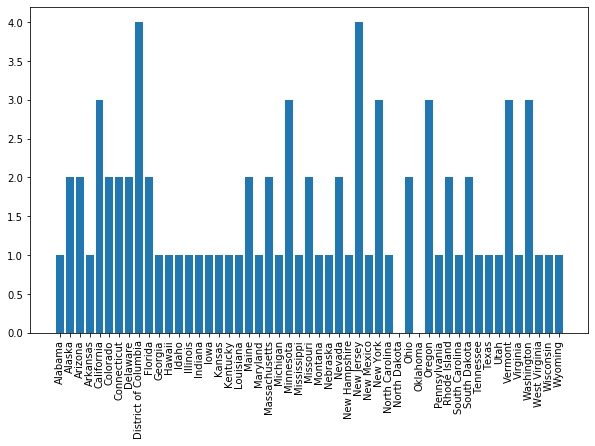

In [11]:
plt.figure(figsize=(10,6))
plt.bar(state_policy_df.sum(axis=1).index, state_policy_df.sum(axis=1))
plt.xticks(rotation=90);

### Metro-level

In [12]:
metro_df = pd.read_csv('../data/processed/metro_df.csv', index_col=0)

In [13]:
df = pd.concat([
    metro_df['comb_metro'].rename('city'),
    metro_df['comb_metro'].str[-2:].rename('state')
], axis=1).sort_values(by=['state', 'city']).reset_index(drop=True)

#### LOCAL NONDISCRIMINATION ORDINANCES

In [14]:
# http://www.lgbtmap.org/equality-maps/non_discrimination_ordinances/policies
non_discrim_sexual_orientation = {
    'Anchorage, AK': True,
    'Little Rock, AR': False,
    'Birmingham, AL': True,
    'Huntsville, AL': False,
    'Mobile, AL': False, # non-comprehensive, inquiring
    'Montgomery, AL': False,
    'Tuscaloosa, AL': False,
    'Phoenix, AZ': True,
    'Tucson, AZ': True,
    'Fresno, CA': True,
    'Los Angeles, CA': True,
    'Sacramento, CA': True,
    'San Diego, CA': True,
    'San Francisco, CA': True,
    'Colorado Springs, CO': True,
    'Denver, CO': True,
    'Hartford, CT': True,
    'Washington, DC': True,
    'Jacksonville, FL': True,
    'Miami, FL': True,
    'Orlando, FL': True,
    'Tallahassee, FL': True,
    'Tampa, FL': True,
    'Atlanta, GA': True,
    'Augusta, GA': False,
    'Columbus, GA': False,
    'Savannah, GA': False,
    'Honolulu, HI': True,
    'Des Moines, IA': True,
    'Boise, ID': True,
    'Idaho Falls, ID': False, # non-comprehensive, inquiring
    'Chicago, IL': True,
    'Fort Wayne, IN': False, # non-comprehensive, inquiring
    'Indianapolis, IN': True,
    'Wichita, KS': False,
    'Lexington, KY': True,
    'Louisville, KY': True,
    'Baton Rouge, LA': False,
    'New Orleans, LA': True,
    'Boston, MA': True,
    'Baltimore, MD': True,
    'Detroit, MI': True,
    'Grand Rapids, MI': True,
    'Minneapolis, MN': True,
    'Kansas City, MO': True,
    'Springfield, MO': False,
    'St. Louis, MO': True,
    'Charlotte, NC': False,
    'Fayetteville, NC': False,
    'Greensboro, NC': False,
    'Raleigh, NC': False,
    'Lincoln, NE': False,
    'Omaha, NE': False, # non-comprehensive, inquiring
    'Albuquerque, NM': True,
    'Las Vegas, NV': True,
    'Reno, NV': True,
    'Buffalo, NY': True,
    'New York City, NY': True,
    'Rochester, NY': True,
    'Syracuse, NY': True,
    'Cincinnati, OH': True,
    'Cleveland, OH': True,
    'Columbus, OH': True,
    'Toledo, OH': True,
    'Oklahoma City, OK': False, # non-comprehensive, inquiring
    'Tulsa, OK': False, # non-comprehensive, inquiring
    'Medford, OR': True,
    'Portland, OR': True,
    'Philadelphia, PA': True,
    'Pittsburgh, PA': True,
    'Chattanooga, TN': False,
    'Clarksville, TN': False,
    'Knoxville, TN': False,
    'Memphis, TN': False,
    'Nashville, TN': False,
    'Austin, TX': True,
    'Corpus Christi, TX': False,
    'Dallas, TX': True,
    'El Paso, TX': False, # non-comprehensive, inquiring
    'Houston, TX': False,
    'Laredo, TX': False,
    'Lubbock, TX': False,
    'San Antonio, TX': False, # non-comprehensive, inquiring
    'Salt Lake City, UT': False, # non-comprehensive, Utah's protections exclude public accommodations
    'Richmond, VA': True,
    'Virginia Beach, VA': False,
    'Seattle, WA': True,
    'Spokane, WA': True,
    'Madison, WI': True,
    'Milwaukee, WI': True,
}

In [15]:
# http://www.lgbtmap.org/equality-maps/non_discrimination_ordinances/policies
non_discrim_gender_identity = {
    'Anchorage, AK': True,
    'Little Rock, AR': False,
    'Birmingham, AL': True,
    'Huntsville, AL': False,
    'Mobile, AL': False, # non-comprehensive, inquiring
    'Montgomery, AL': False,
    'Tuscaloosa, AL': False,
    'Phoenix, AZ': True,
    'Tucson, AZ': True,
    'Fresno, CA': True,
    'Los Angeles, CA': True,
    'Sacramento, CA': True,
    'San Diego, CA': True,
    'San Francisco, CA': True,
    'Colorado Springs, CO': True,
    'Denver, CO': True,
    'Hartford, CT': True,
    'Washington, DC': True,
    'Jacksonville, FL': True,
    'Miami, FL': True,
    'Orlando, FL': True,
    'Tallahassee, FL': True,
    'Tampa, FL': True,
    'Atlanta, GA': True,
    'Augusta, GA': False,
    'Columbus, GA': False,
    'Savannah, GA': False,
    'Honolulu, HI': True,
    'Des Moines, IA': True,
    'Boise, ID': True,
    'Idaho Falls, ID': False, # non-comprehensive, inquiring
    'Chicago, IL': True,
    'Fort Wayne, IN': False,
    'Indianapolis, IN': True,
    'Wichita, KS': False,
    'Lexington, KY': True,
    'Louisville, KY': True,
    'Baton Rouge, LA': False,
    'New Orleans, LA': True,
    'Boston, MA': True,
    'Baltimore, MD': True,
    'Detroit, MI': True,
    'Grand Rapids, MI': True,
    'Minneapolis, MN': True,
    'Kansas City, MO': True,
    'Springfield, MO': False,
    'St. Louis, MO': True,
    'Charlotte, NC': False,
    'Fayetteville, NC': False,
    'Greensboro, NC': False,
    'Raleigh, NC': False,
    'Lincoln, NE': False,
    'Omaha, NE': False, # non-comprehensive, inquiring
    'Albuquerque, NM': True,
    'Las Vegas, NV': True,
    'Reno, NV': True,
    'Buffalo, NY': True,
    'New York City, NY': True,
    'Rochester, NY': True,
    'Syracuse, NY': True,
    'Cincinnati, OH': True,
    'Cleveland, OH': True,
    'Columbus, OH': True,
    'Toledo, OH': True,
    'Oklahoma City, OK': False, # non-comprehensive, inquiring
    'Tulsa, OK': False, # non-comprehensive, inquiring
    'Medford, OR': True,
    'Portland, OR': True,
    'Philadelphia, PA': True,
    'Pittsburgh, PA': True,
    'Chattanooga, TN': False,
    'Clarksville, TN': False,
    'Knoxville, TN': False,
    'Memphis, TN': False,
    'Nashville, TN': False,
    'Austin, TX': True,
    'Corpus Christi, TX': False,
    'Dallas, TX': True,
    'El Paso, TX': False, # non-comprehensive, inquiring
    'Houston, TX': False,
    'Laredo, TX': False,
    'Lubbock, TX': False,
    'San Antonio, TX': False, # non-comprehensive, inquiring
    'Salt Lake City, UT': False, # non-comprehensive, Utah's protections exclude public accommodations
    'Richmond, VA': True,
    'Virginia Beach, VA': False,
    'Seattle, WA': True,
    'Spokane, WA': True,
    'Madison, WI': True,
    'Milwaukee, WI': True,
}

In [16]:
# Make df from non_discrim_sexual_orientation dict
metro_policy_df = pd.DataFrame.from_dict(non_discrim_sexual_orientation, orient='index', columns=['non_discrim_sexual_orientation'])

In [17]:
# Add `non_discrim_gender_identity` feature
metro_policy_df['non_discrim_gender_identity'] = metro_policy_df.index.to_series().map(non_discrim_gender_identity)

#### Walk score, transit score, and bike score

In [18]:
# https://www.walkscore.com/cities-and-neighborhoods/
walkscore_df = pd.read_html('https://www.walkscore.com/cities-and-neighborhoods/')[0]

In [19]:
# Match walk, transit, and bike scores to Metros in our df
for metro in metro_policy_df.index:
    for i in walkscore_df.index:
        city = walkscore_df.at[i, 'City']
        if city in metro:
            metro_policy_df.at[metro, 'walk_score'] = walkscore_df.at[i, 'Walk Score']
            metro_policy_df.at[metro, 'transit_score'] = walkscore_df.at[i, 'Transit Score']
            metro_policy_df.at[metro, 'bike_score'] = walkscore_df.at[i, 'Bike Score']
    # Deal with 'Washington, DC' separately because of spelling
    if metro == 'Washington, DC':
        dc_index = walkscore_df[walkscore_df.City == 'Washington D.C.'].index[0]
        metro_policy_df.at[metro, 'walk_score'] = walkscore_df.at[dc_index, 'Walk Score']
        metro_policy_df.at[metro, 'transit_score'] = walkscore_df.at[dc_index, 'Transit Score']
        metro_policy_df.at[metro, 'bike_score'] = walkscore_df.at[dc_index, 'Bike Score']
        
# Change all '--' to nulls
metro_policy_df = metro_policy_df.replace('--', np.nan)

In [20]:
metro_policy_df

,non_discrim_sexual_orientation,non_discrim_gender_identity,walk_score,transit_score,bike_score
"Anchorage, AK",True,True,32.0,21.2,NaN
"Little Rock, AR",False,False,NaN,NaN,NaN
"Birmingham, AL",True,True,35.4,25.3,24.5
"Huntsville, AL",False,False,NaN,NaN,NaN
"Mobile, AL",False,False,NaN,NaN,NaN
"Montgomery, AL",False,False,26.9,16.4,32.0
"Tuscaloosa, AL",False,False,NaN,NaN,NaN
"Phoenix, AZ",True,True,40.8,36.0,52.4
"Tucson, AZ",True,True,42.4,35.1,63.7
"Fresno, CA",True,True,46.3,31.5,56.6


#### Diana start here

In [41]:
cannabis_dfs = pd.read_html('https://en.wikipedia.org/wiki/Legality_of_cannabis_by_U.S._jurisdiction')
cannabis_df = cannabis_dfs[1]

cannabis_df = cannabis_df.drop(cannabis_df.index[[10, 21, 32, 43, 54]])
weed_df = cannabis_df[['State', 'Recreational', 'Medical']]

for i in weed_df.index:
    if 'CBD' in weed_df.at[i, 'Medical'] or 'cannabis oil less than' in weed_df.at[i, 'Medical']:
        weed_df.at[i, 'Medical'] = 'illegal'

#manually adjusting Vermont
weed_df.at[48, 'Medical'] = 'legal'

for j in weed_df.index:
    if 'misdemeanor' in weed_df.at[j, 'Recreational'] or 'felony' in weed_df.at[j, 'Recreational'] or 'illegal' in weed_df.at[j, 'Recreational'] or 'decriminalized' in weed_df.at[j, 'Recreational'] or 'Decriminalized' in weed_df.at[j, 'Recreational'] or 'Illegal' in weed_df.at[j, 'Recreational'] :
        weed_df.at[j, 'Recreational'] = 'illegal'

#manually adjusting Vermont
weed_df.at[48, 'Recreational'] = 'legal'

weed_df

,State,Recreational,Medical
0,Alabama,illegal,illegal
1,Alaska,legal,legal
2,Arizona,illegal,legal
3,Arkansas,illegal,legal
4,California,legal,legal
5,Colorado,legal,legal
6,Connecticut,illegal,legal
7,Delaware,illegal,legal
8,Florida,illegal,legal
9,Georgia,illegal,illegal
